In [1]:
# Include parent directory to system path in order to work with omrsynth
# without installation for experimental purposes...

import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import omrsynth.util.noises as noises

from ipywidgets import widgets
from IPython.display import display

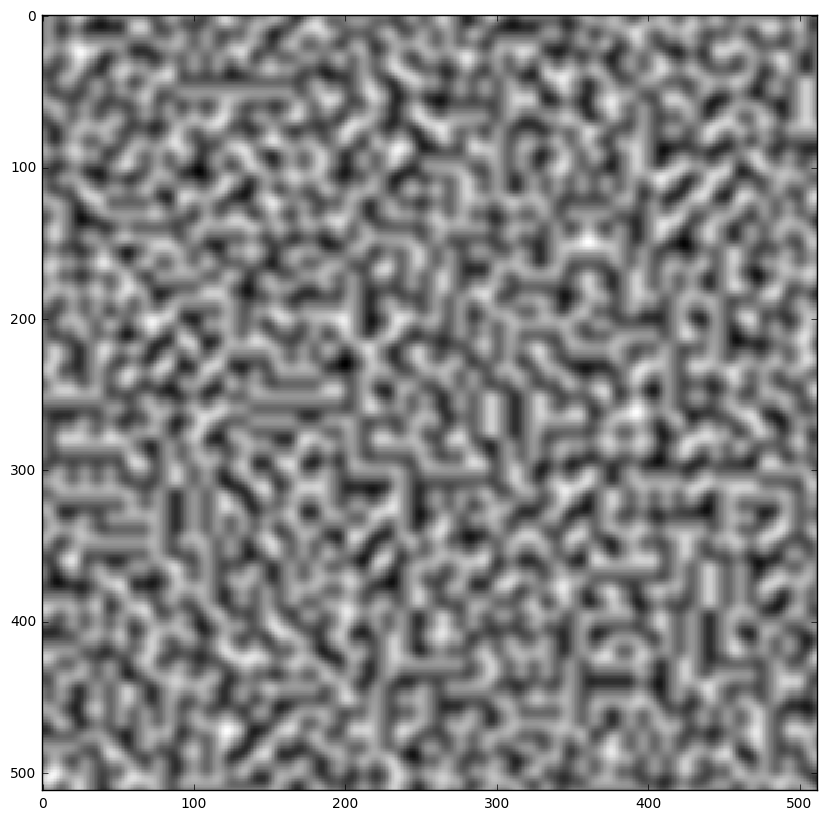

In [4]:
# Width and Height of the noise image:
image_width = widgets.BoundedIntText(value=512, min=64, max=4096, description='width')
image_height = widgets.BoundedIntText(value=512, min=64, max=4096, description='height')
display(image_width, image_height)

# Set noise type:
noise_types = ['Perlin', 'Simplex']


def set_type(noise_type):
    globals()['noise_type'] = noise_type
    
widgets.interact(set_type, noise_type=noise_types);

# Set shifts:
def set_shifts(shift_x, shift_y):
    globals()['shift_x'] = shift_x
    globals()['shift_y'] = shift_y

widgets.interact(set_shifts,
                 shift_x=widgets.FloatSlider(min=-4096.0, max=4096.0, step=0.1, value=0),
                 shift_y=widgets.FloatSlider(min=-4096.0, max=4096.0, step=0.1, value=0)
                );

# Set octaves and frequencies:
def set_of(octaves, frequency_x, frequency_y):
    globals()['octaves'] = octaves
    globals()['frequency_x'] = frequency_x
    globals()['frequency_y'] = frequency_y

widgets.interact(set_of,
                 octaves=widgets.IntSlider(min=1, max=128, step=1, value=1),
                 frequency_x=widgets.FloatSlider(min=1, max=1024.0, step=0.1, value=16),
                 frequency_y=widgets.FloatSlider(min=1, max=1024.0, step=0.1, value=16)
                );

# Set persistence and lacunarity:
def set_pl(persistence, lacunarity):
    globals()['persistence'] = persistence
    globals()['lacunarity'] = lacunarity

widgets.interact(set_pl,
                 persistence=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5),
                 lacunarity=widgets.FloatSlider(min=1.0, max=10.0, step=0.01, value=2.0)
                );


def plot_noise_image(b):
    global noise_types, noise_type, octaves, frequency_x, frequency_y, persistence, lacunarity
    global noise_image, shift_x, shift_y
    
    shape = (image_height.value, image_width.value)
    
    if noise_type == noise_types[0]:
        noise_image = noises.perlin_noise(shape, shift_x, shift_y,
                                          frequency_x, frequency_y, octaves, persistence, lacunarity)
    else:
        noise_image = noises.simplex_noise(shape, shift_x, shift_y,
                                           frequency_x, frequency_y, octaves, persistence, lacunarity)

    plt.figure(figsize=(10, 10))
    plt.imshow(noise_image, cmap='gray', interpolation='nearest');
    skimage.io.imsave('../imgs/noise.png', noise_image)


# Plotting button:
button = widgets.Button(description='Plot Noise!')
button.on_click(plot_noise_image)
display(button)